In [1]:
def combine_two_color_images(image1, image2):

    foreground, background = image1.copy(), image2.copy()
    
    foreground_height = foreground.shape[0]
    foreground_width = foreground.shape[1]
    alpha =0.5
    
    # do composite on the upper-left corner of the background image.
    blended_portion = cv2.addWeighted(foreground,
                alpha,
                background[:foreground_height,:foreground_width,:],
                1 - alpha,
                0,
                background)
    background[:foreground_height,:foreground_width,:] = blended_portion
    return background

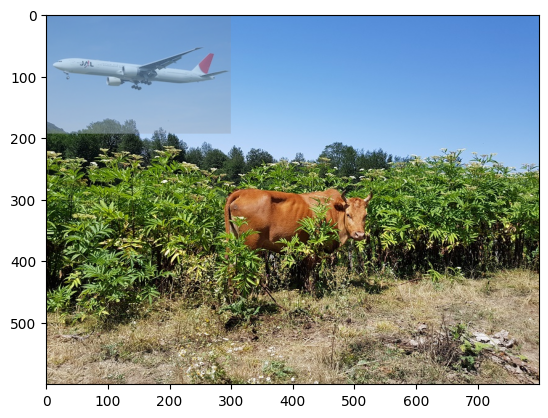

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read images
src = cv2.imread("images/airplane.jpg")
dst = cv2.imread("images/input.jpg")
result = combine_two_color_images(src, dst)
plt.imshow(result[...,::-1])

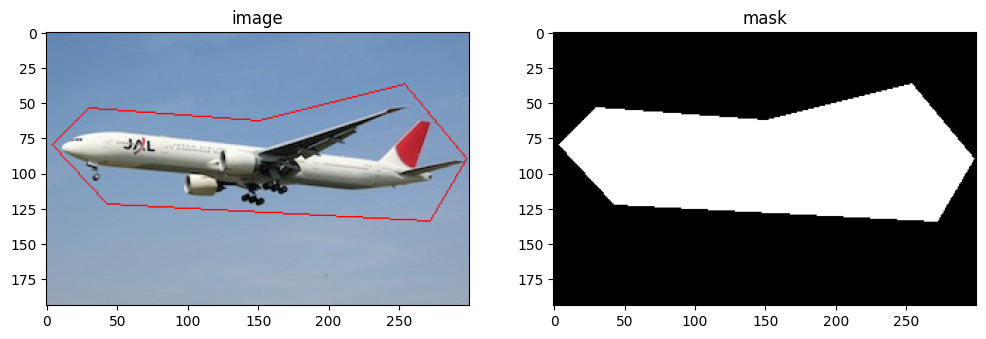

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("images/airplane.jpg")
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.polylines(src, [poly],1, (0, 0, 255))

src_mask = np.zeros(src.shape, src.dtype)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))


plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(src[...,::-1]);plt.title("image");
plt.subplot(122);plt.imshow(src_mask[...,::-1]);plt.title("mask");

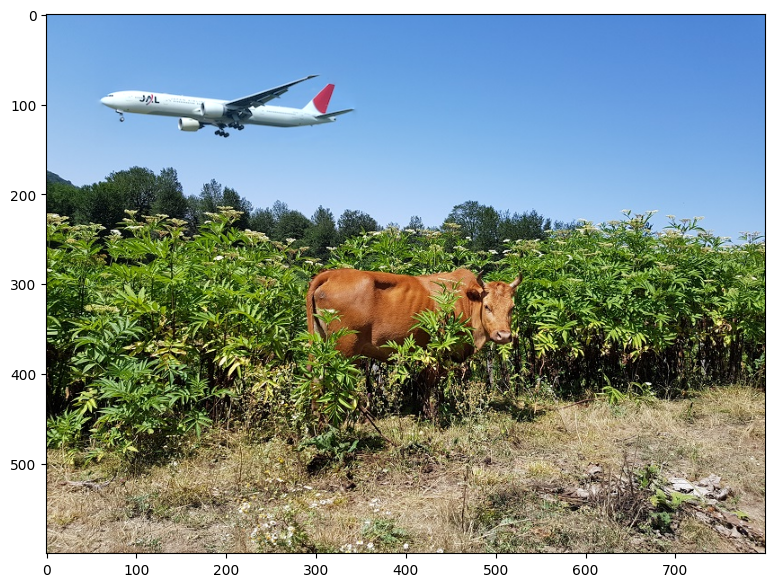

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read images
src = cv2.imread("images/airplane.jpg")
dst = cv2.imread("images/input.jpg")

# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (200,100)

# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

plt.figure(figsize=[12,7])
plt.imshow(output[...,::-1])

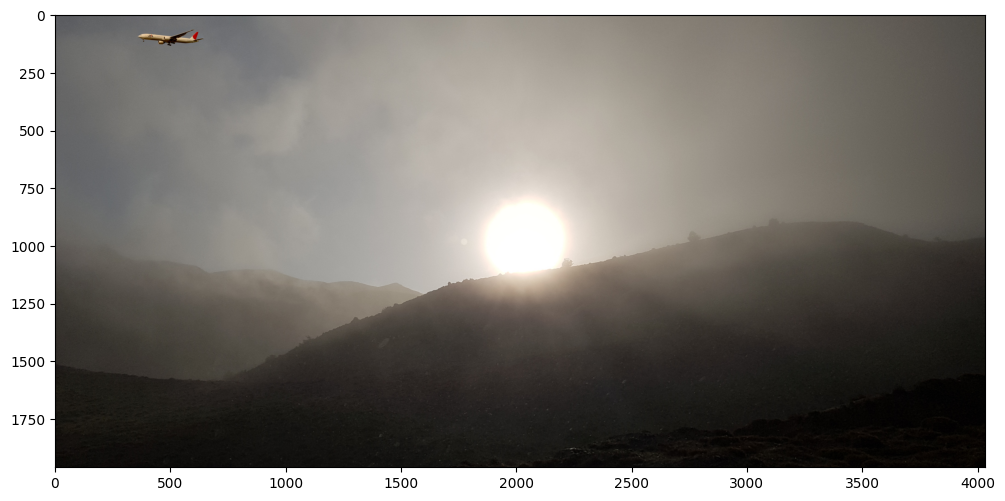

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read images
src = cv2.imread("images/airplane.jpg")
dst = cv2.imread("images/aa.jpg")

# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (500,100)

# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

plt.figure(figsize=[12,7])
plt.imshow(output[...,::-1])

#  Mixed and Normal clonning

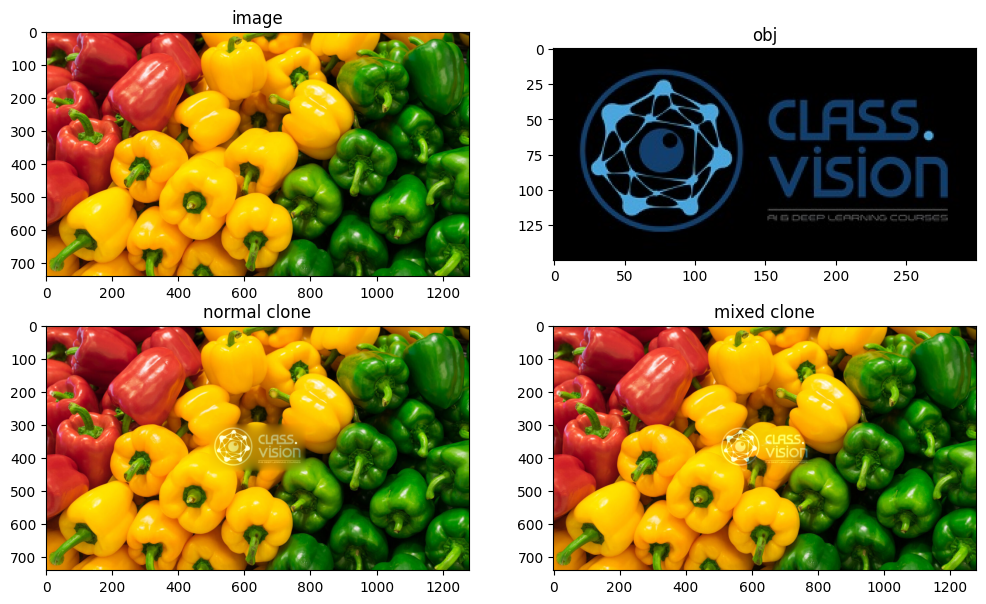

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read images : src image will be cloned into dst
im = cv2.imread("images/bell-pepper.jpg")
obj= cv2.imread("images/class.vision.jpg")

# Create an all white mask
mask = 255 * np.ones(obj.shape, obj.dtype)

# The location of the center of the src in the dst
width, height, channels = im.shape
center = (int(height/2), int(width/2))

# Seamlessly clone src into dst and put the results in output
normal_clone = cv2.seamlessClone(obj, im, mask, center, cv2.NORMAL_CLONE)
mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)

plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(im[...,::-1]);plt.title("image");
plt.subplot(222);plt.imshow(obj[...,::-1]);plt.title("obj");
plt.subplot(223);plt.imshow(normal_clone[...,::-1]);plt.title("normal clone");
plt.subplot(224);plt.imshow(mixed_clone[...,::-1]);plt.title("mixed clone");

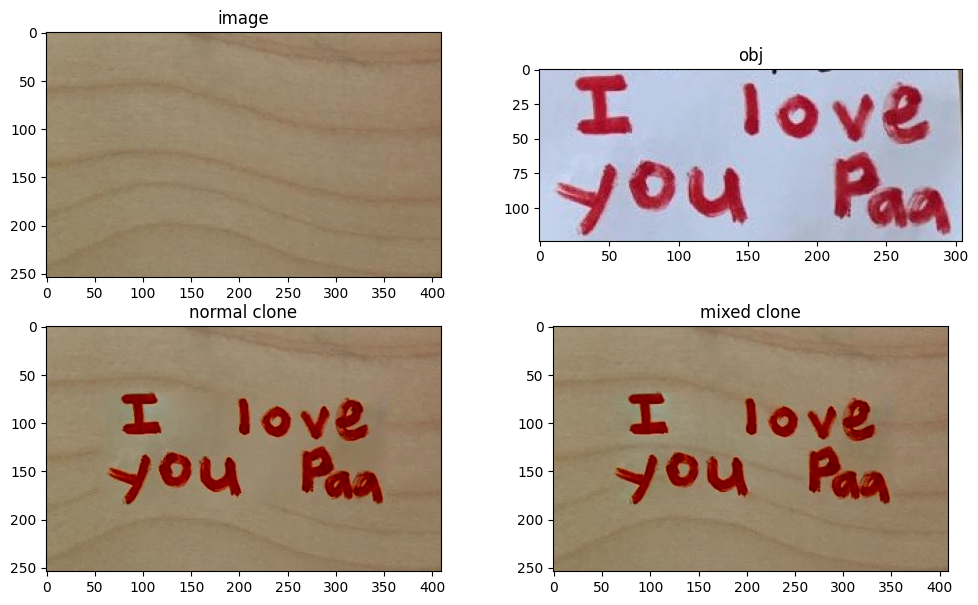

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read images : src image will be cloned into dst
im = cv2.imread("images/wood-texture.jpg")
obj= cv2.imread("images/iloveyouticket.jpg")

# Create an all white mask
mask = 255 * np.ones(obj.shape, obj.dtype)

# The location of the center of the src in the dst
width, height, channels = im.shape
center = (int(height/2), int(width/2))

# Seamlessly clone src into dst and put the results in output
normal_clone = cv2.seamlessClone(obj, im, mask, center, cv2.NORMAL_CLONE)
mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)

plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(im[...,::-1]);plt.title("image");
plt.subplot(222);plt.imshow(obj[...,::-1]);plt.title("obj");
plt.subplot(223);plt.imshow(normal_clone[...,::-1]);plt.title("normal clone");
plt.subplot(224);plt.imshow(mixed_clone[...,::-1]);plt.title("mixed clone");